In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
batch_size = 32

train_dataset = datasets.MNIST('./data', train = True, download = True, transform = transforms.ToTensor())
validation_dataset = datasets.MNIST('./data', train = False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = batch_size, shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
for (x_train, y_train) in train_loader:
  print("x_train", x_train.size(), "x_type",x_train.type())
  print("y_train", y_train.size(), "y_type",y_train.type())
  break

x_train torch.Size([32, 1, 28, 28]) x_type torch.FloatTensor
y_train torch.Size([32]) y_type torch.LongTensor


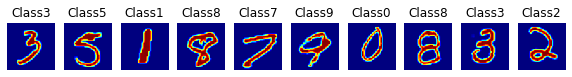

In [5]:
plt.figure(figsize = (10,4))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(x_train[i, :, :, :].numpy().reshape(28, 28), cmap = 'jet')
  plt.title("Class" + str(y_train[i].item()))

In [6]:
class Net(nn.Module):
  
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 50)
    self.fc2 = nn.Linear(50, 50)
    self.fc3 = nn.Linear(50, 10)
  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return F.log_softmax(self.fc3(x), dim = 1)

In [7]:
model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [8]:
def train(epoch, log_interval = 200):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data = data.to(device)
    target = target.to(device)

    optimizer.zero_grad()

    output = model(data)
    loss = criterion(output, target)

    loss.backward()

    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset), 100 * batch_idx / len(train_loader), loss.data.item()))

In [9]:
def validate(loss_vector, accuracy_vector):
  model.eval()
  val_loss, correct = 0, 0
  for data, target in validation_loader:
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    val_loss += criterion(output, target).data.item()
    pred = output.data.max(1)[1]
    correct += pred.eq(target.data).cpu().sum()
  
  val_loss /= len(validation_loader)
  loss_vector.append(val_loss)
  
  accuracy = 100. * correct.to(torch.float32)/len(validation_loader.dataset)
  accuracy_vector.append(accuracy)

  print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(val_loss, correct, len(validation_loader.dataset),accuracy))

In [10]:
%%time
epochs = 10
lossv, accv = [], []
for epoch in range(1, epochs + 1):
  train(epoch)
  validate(lossv,accv)

Train: 1 [0/60000 (0%)]	Loss: 2.298525
Train: 1 [6400/60000 (11%)]	Loss: 2.067612
Train: 1 [12800/60000 (21%)]	Loss: 1.228075
Train: 1 [19200/60000 (32%)]	Loss: 0.648322
Train: 1 [25600/60000 (43%)]	Loss: 0.843531
Train: 1 [32000/60000 (53%)]	Loss: 0.394292
Train: 1 [38400/60000 (64%)]	Loss: 0.357972
Train: 1 [44800/60000 (75%)]	Loss: 0.655905
Train: 1 [51200/60000 (85%)]	Loss: 0.208288
Train: 1 [57600/60000 (96%)]	Loss: 0.400149

Validation set: Average loss: 0.3284, Accuracy: 9047/10000 (90%)

Train: 2 [0/60000 (0%)]	Loss: 0.233168
Train: 2 [6400/60000 (11%)]	Loss: 0.115450
Train: 2 [12800/60000 (21%)]	Loss: 0.196534
Train: 2 [19200/60000 (32%)]	Loss: 0.131525
Train: 2 [25600/60000 (43%)]	Loss: 0.202272
Train: 2 [32000/60000 (53%)]	Loss: 0.159993
Train: 2 [38400/60000 (64%)]	Loss: 0.238909
Train: 2 [44800/60000 (75%)]	Loss: 0.282252
Train: 2 [51200/60000 (85%)]	Loss: 0.362173
Train: 2 [57600/60000 (96%)]	Loss: 0.083444

Validation set: Average loss: 0.2585, Accuracy: 9266/10000 (93%)

In [13]:
# a = torch.randn((3, 3))
# b = a.view(-1, 3*3)
# print(a)
# print(b)